# Notebook for rink maps

## Housekeeping

### Import dependencies

In [18]:
import pandas as pd
import numpy as np

from chickenstats.chicken_nhl import Season, Scraper

from hockey_rink import NHLRink, RinkImage
import matplotlib.pyplot as plt
import seaborn as sns

### Pandas options

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Scrape data

### Schedule and game IDs

In [6]:
season = Season(2023)

In [7]:
schedule = season.schedule("NSH")

Output()

In [9]:
game_id = schedule.game_id.iloc[0]

### Play-by-play

In [11]:
scraper = Scraper(game_id)

In [12]:
pbp = scraper.play_by_play

Output()

## Rink plots

### Practice drawing

In [23]:
rink = NHLRink(rotation = 90)

<Axes: >

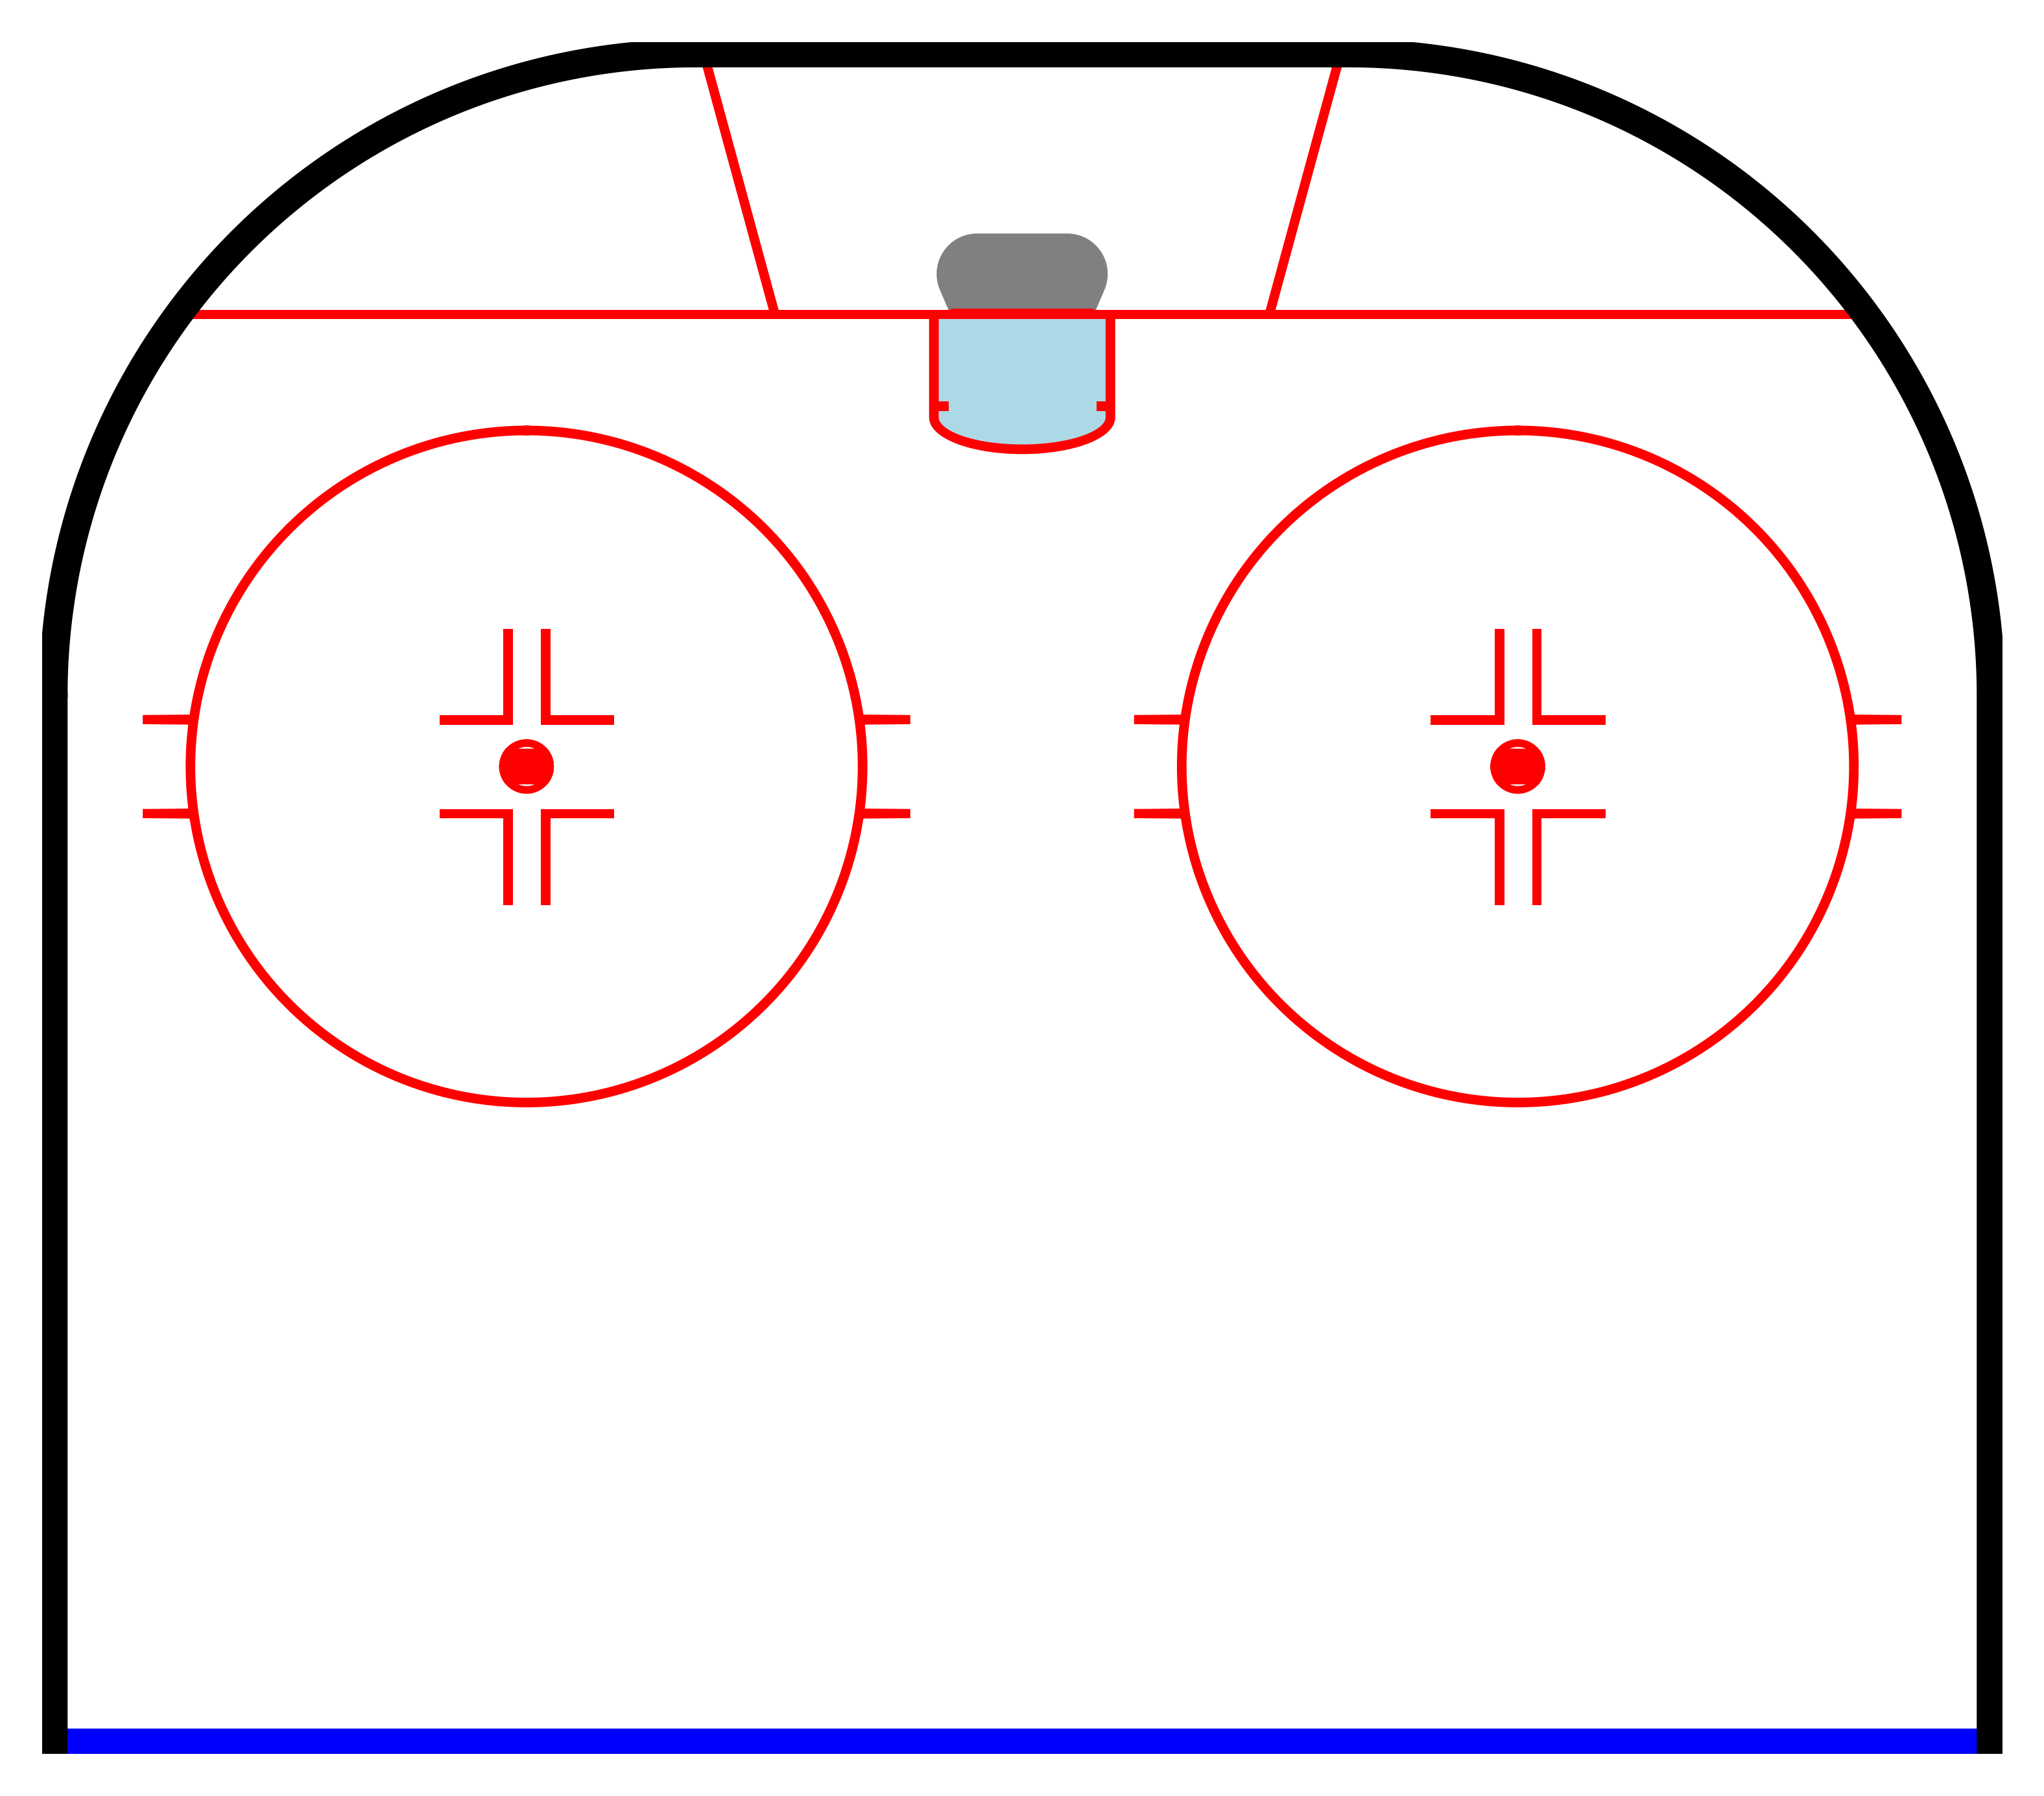

In [39]:
fig, ax = plt.subplots(dpi=650, figsize=(6, 6))

rink.draw(display_range="ozone", ax=ax)

In [75]:
shot_events = ['GOAL', 'SHOT', 'MISS']
strengths = ['5v5']

conds = np.logical_and(pbp.event.isin(shot_events), pbp.strength_state.isin(strengths))

shots = pbp.loc[conds].reset_index(drop=True)

In [80]:
def norm_coords(data, norm_team):

    norm_team_conds = np.logical_and(data.event_team == norm_team,
                                             data.coords_x < 0)

    data['norm_coords_x'] = np.where(norm_team_conds, data.coords_x * -1, data.coords_x)

    data['norm_coords_y'] = np.where(norm_team_conds, data.coords_y * -1, data.coords_y)

    opp_team_conds = np.logical_and(data.event_team != norm_team,
                                             data.coords_x > 0)

    data['norm_coords_x'] = np.where(opp_team_conds, data.coords_x * -1, data.norm_coords_x)

    data['norm_coords_y'] = np.where(opp_team_conds, data.coords_y * -1, data.norm_coords_y)

    return data

<Axes: xlabel='norm_coords_x', ylabel='norm_coords_y'>

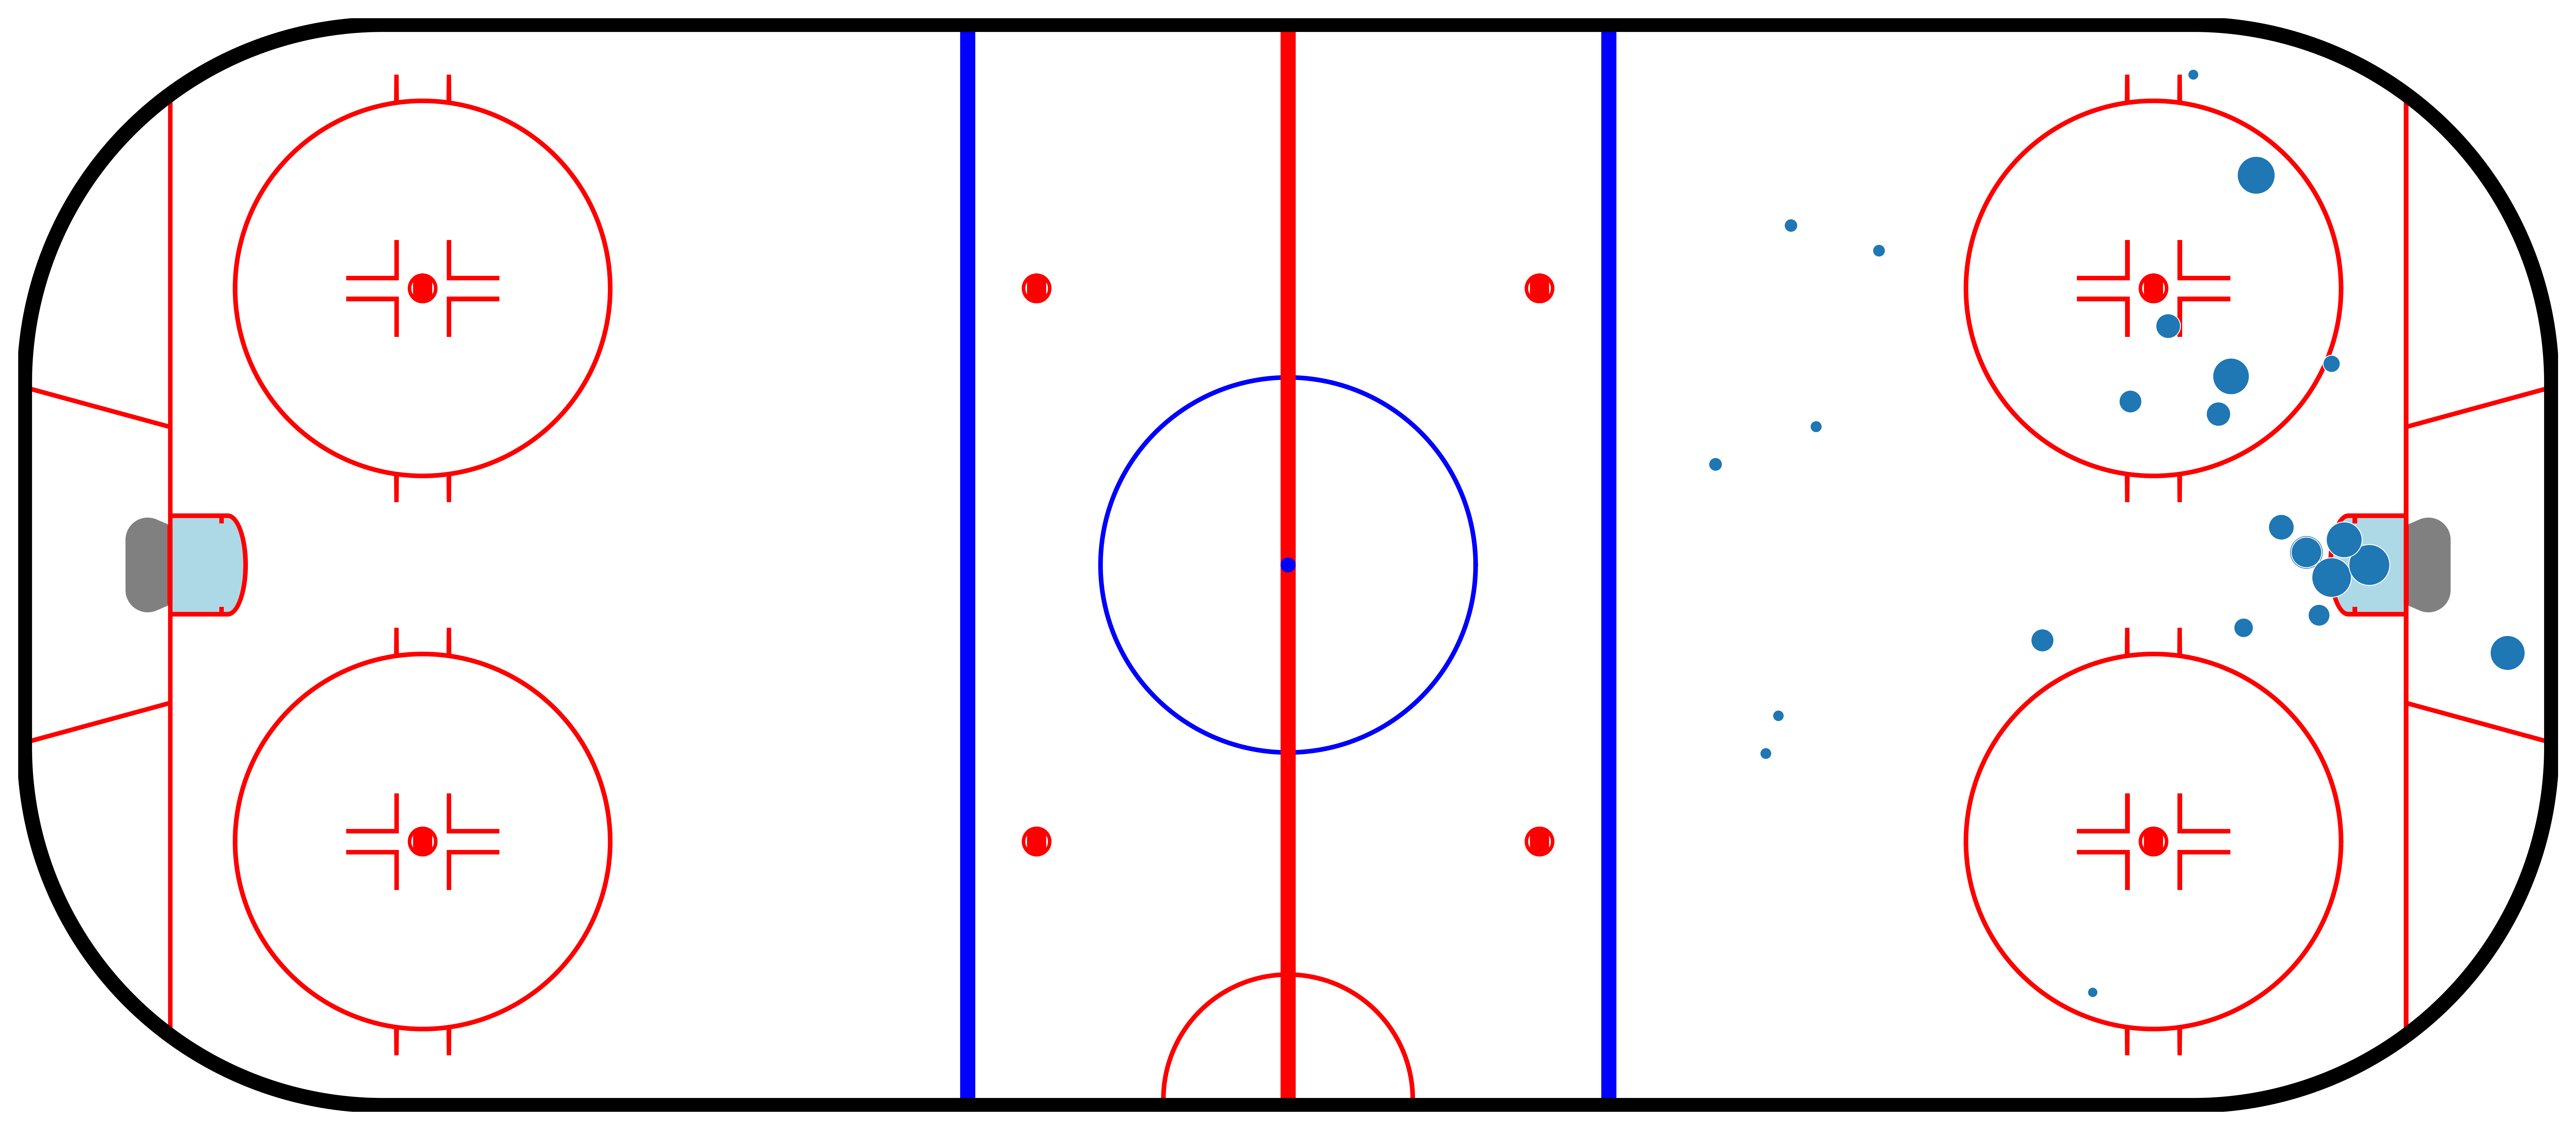

In [114]:
rink = NHLRink()

fig, ax = plt.subplots(dpi=650, figsize=(18, 8))

rink.draw(ax=ax,)

data = norm_coords(shots, "NSH")

data = data.loc[data.event_team == "NSH"]

sns.scatterplot(data=data, x="norm_coords_x", y="norm_coords_y", s=data.pred_goal*750, ax=ax, zorder=100)

#rink.plot_fn(sns.scatterplot, data=data, x="norm_coords_x", y="norm_coords_y", ax=ax)
#rink.plot_fn(sns.scatterplot, data=data, x="coords_x", y="coords_y", sizes=100, ax=ax)

<Axes: xlabel='norm_coords_x', ylabel='norm_coords_y'>

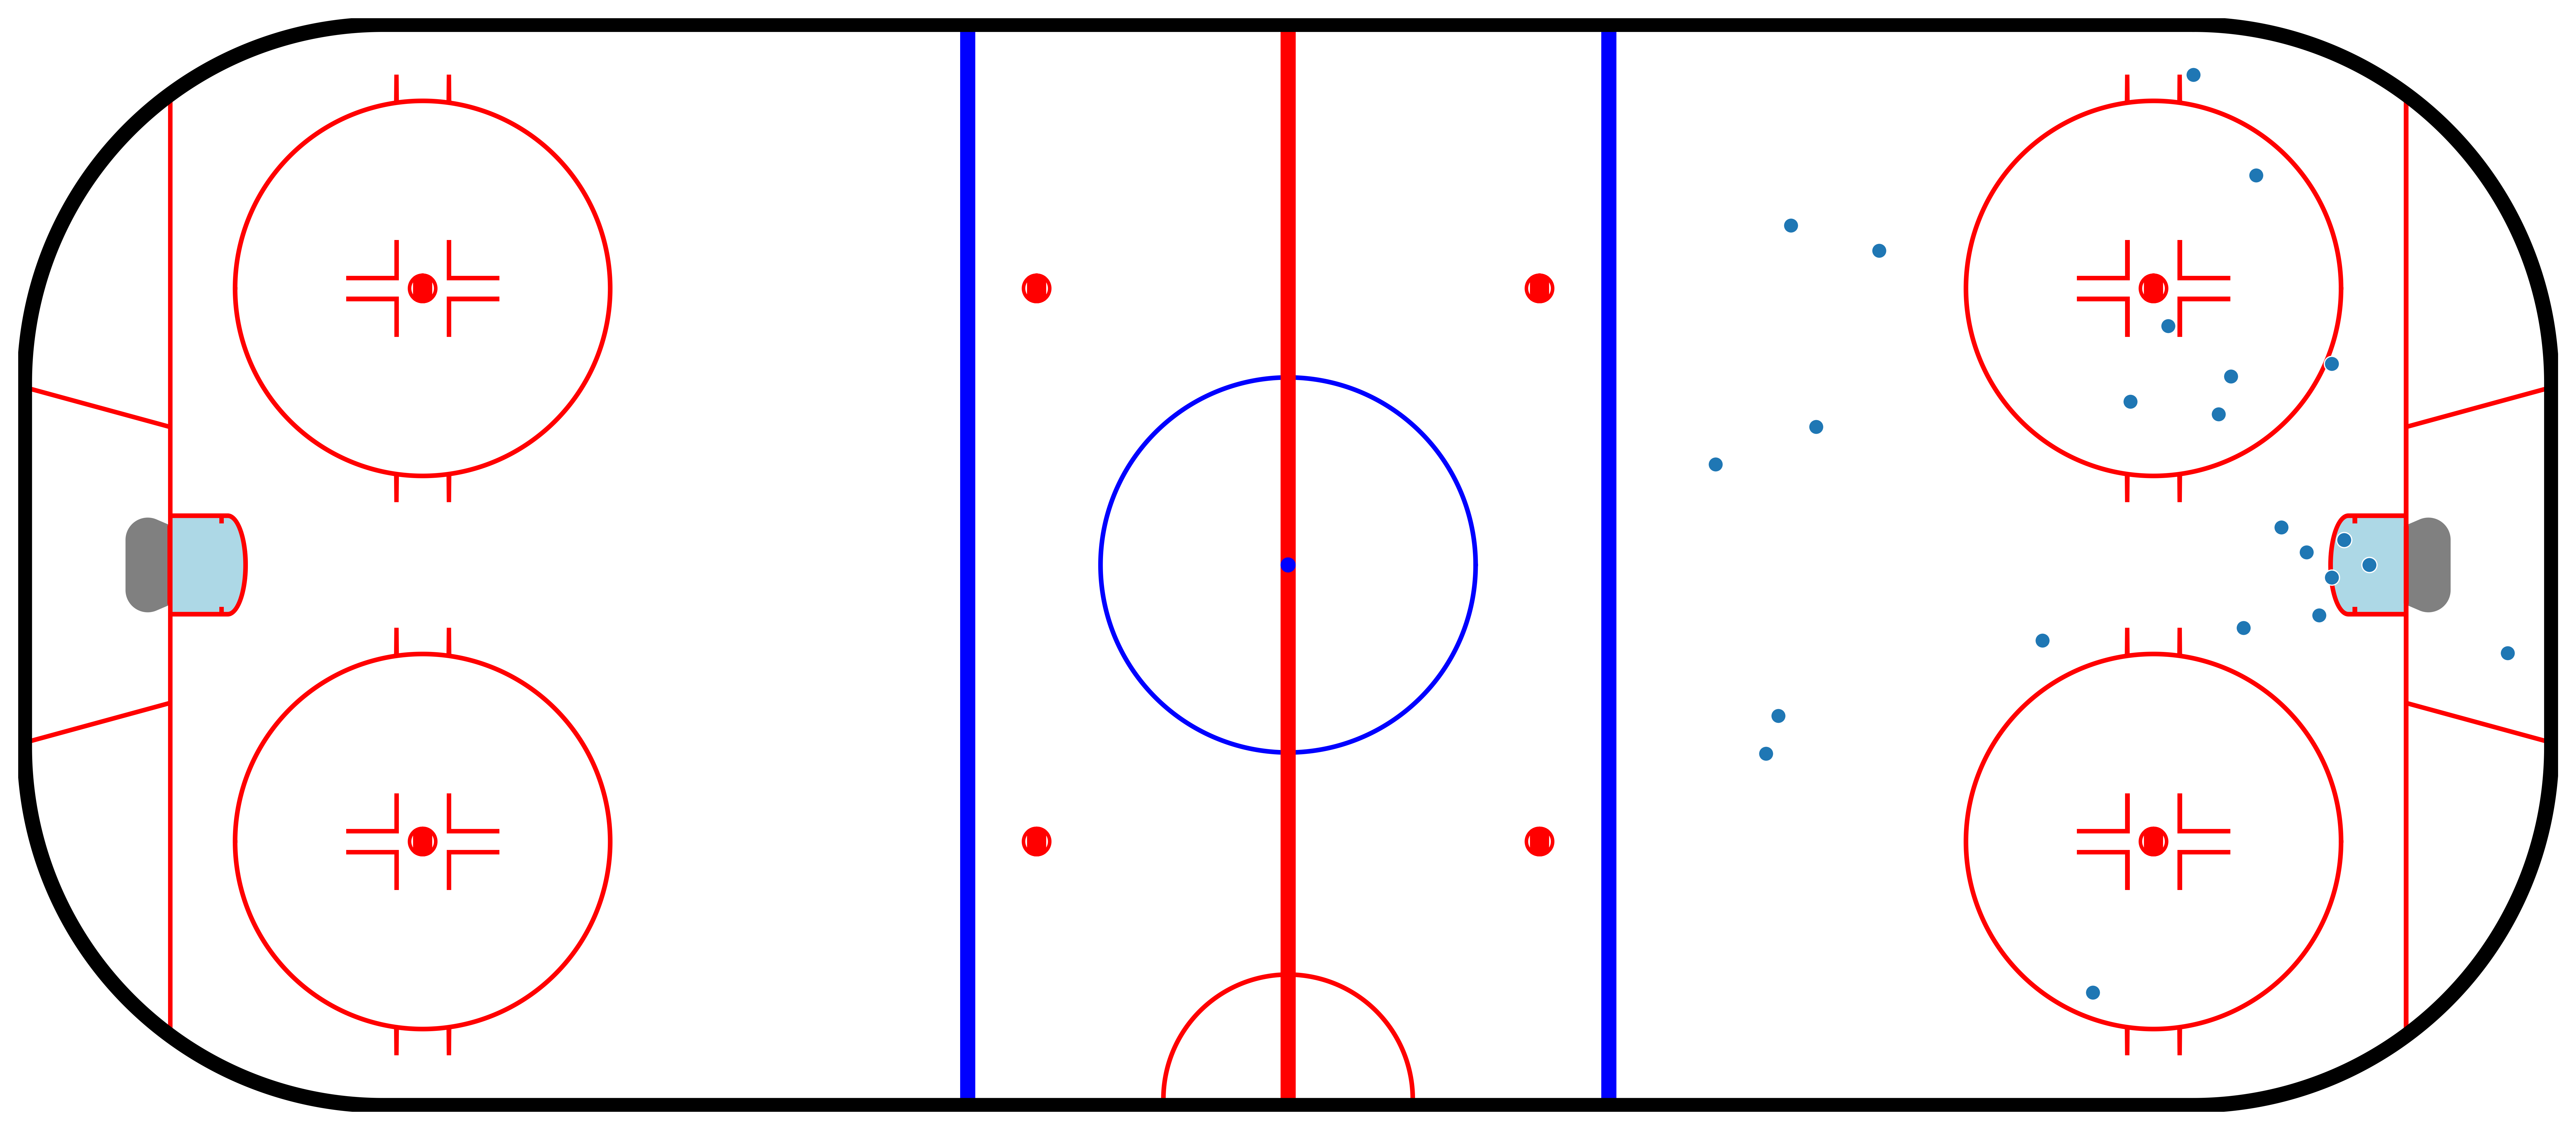

In [83]:
rink = NHLRink()

fig, ax = plt.subplots(dpi=650, figsize=(18, 8))

rink.draw(ax=ax)

#sns.scatterplot(data=shots, x="coords_x", y="coords_y", ax=ax)

data = norm_coords(shots, "NSH")

data = data.loc[data.event_team == "NSH"]

rink.plot_fn(sns.scatterplot, data=data, x="norm_coords_x", y="norm_coords_y", ax=ax)
#rink.plot_fn(sns.scatterplot, data=data, x="coords_x", y="coords_y", ax=ax)

In [ ]:
shots.head(3)

In [85]:
shots.pred_goal.max()

0.3484644889831543